In [4]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('tamil_movie_dataset.csv')
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (50, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MovieID   50 non-null     int64  
 1   Title     50 non-null     object 
 2   Genre     50 non-null     object 
 3   Director  50 non-null     object 
 4   Year      50 non-null     int64  
 5   Rating    50 non-null     float64
 6   Rank      50 non-null     int64  
 7   Actors    50 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 3.3+ KB


In [12]:
# Check for missing values in 'Rating'
if df['Rating'].isnull().sum() > 0:
    df['Rating'].fillna(df['Rating'].mean(), inplace=True)

# Simulate vote_count (v) from rating — multiplied by 10 for demo purposes
v = df['Rating'] * 10
v = v.astype(int)  # Ensure it's treated as integer vote count

R = df['Rating']
C = df['Rating'].mean()
m = v.quantile(0.70)

# Apply Weighted Average Formula safely
df['weighted_average'] = ((R * v) + (C * m)) / (v + m)

# Show result
df[['Title', 'Rating', 'weighted_average']].head()

,Title,Rating,weighted_average
0,Vikram,8.6,8.104328
1,Kaithi,8.5,8.050235
2,Master,7.8,7.687721
3,Soorarai Pottru,8.7,8.158966
4,Jai Bhim,8.8,8.214141


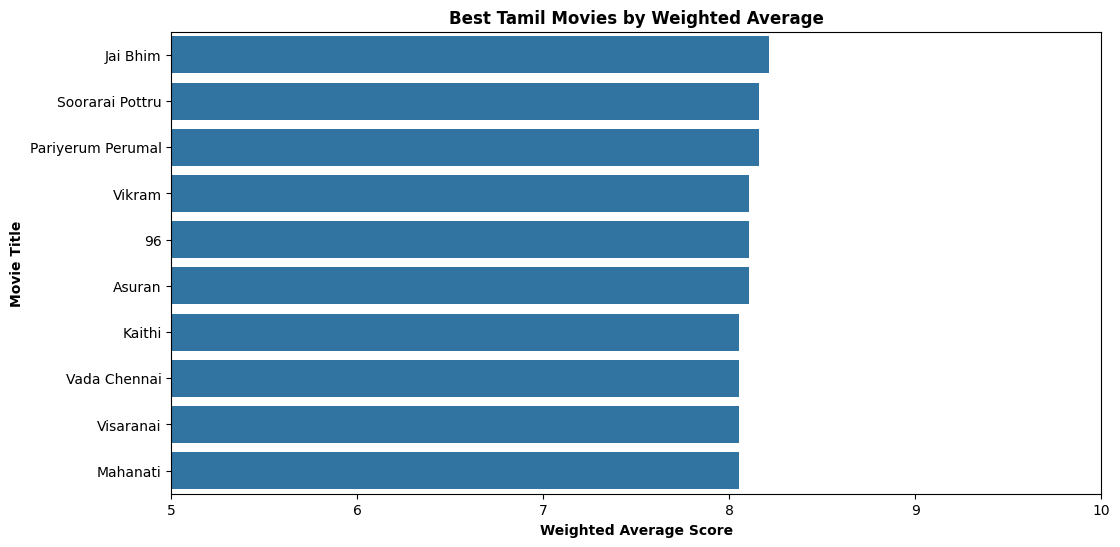

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by weighted_average
weight_average = df.sort_values('weighted_average', ascending=False)

plt.figure(figsize=(12, 6))
axis1 = sns.barplot(
    x=weight_average['weighted_average'].head(10),
    y=weight_average['Title'].head(10),
    data=weight_average
)

plt.xlim(5, 10)
plt.title('Best Tamil Movies by Weighted Average', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_tamil_movies.png')
plt.show()

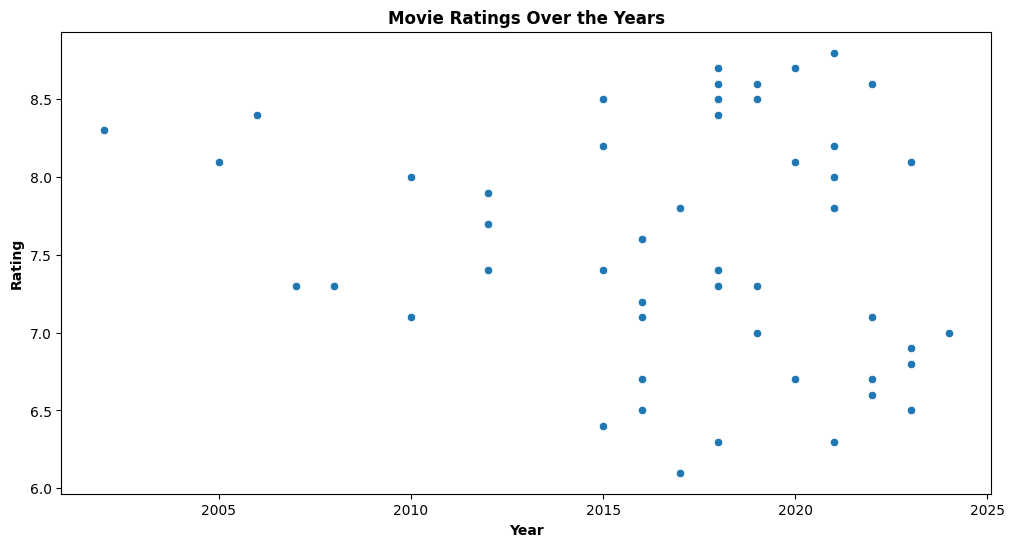

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Rating', data=df)
plt.title('Movie Ratings Over the Years', weight='bold')
plt.xlabel('Year', weight='bold')
plt.ylabel('Rating', weight='bold')
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()
movie_scaled_df = scaling.fit_transform(df[['weighted_average', 'Rating']])

movie_normalized_df = pd.DataFrame(movie_scaled_df, columns=['weighted_average', 'Rating'])

movie_normalized_df.head()

,weighted_average,Rating
0,0.913436,0.925926
1,0.870795,0.888889
2,0.585031,0.629630
3,0.956507,0.962963
4,1.000000,1.000000


In [21]:
# Add normalized columns to main DataFrame
df[['normalized_weighted_average', 'normalized_rating']] = movie_normalized_df

# Final Score = 0.5 * weight_avg + 0.5 * rating
df['score'] = df['normalized_weighted_average'] * 0.5 + df['normalized_rating'] * 0.5

df.head()

,MovieID,Title,Genre,Director,Year,Rating,Rank,Actors,weighted_average,normalized_weighted_average,normalized_rating,score
0,1,Vikram,Action,Lokesh Kanagaraj,2022,8.6,1,"Kamal Haasan, Vijay Sethupathi",8.104328,0.913436,0.925926,0.919681
1,2,Kaithi,Action,Lokesh Kanagaraj,2019,8.5,2,"Karthi, Narain",8.050235,0.870795,0.888889,0.879842
2,3,Master,Action/Drama,Lokesh Kanagaraj,2021,7.8,3,"Vijay, Vijay Sethupathi",7.687721,0.585031,0.629630,0.607330
3,4,Soorarai Pottru,Drama,Sudha Kongara,2020,8.7,4,"Suriya, Aparna Balamurali",8.158966,0.956507,0.962963,0.959735
4,5,Jai Bhim,Legal Drama,T.J. Gnanavel,2021,8.8,5,"Suriya, Lijomol Jose",8.214141,1.000000,1.000000,1.000000


In [24]:
# Add normalized columns to main DataFrame
df[['normalized_weighted_average', 'normalized_rating']] = movie_normalized_df

# Final Score = 0.5 * weight_avg + 0.5 * rating
df['score'] = df['normalized_weighted_average'] * 0.5 + df['normalized_rating'] * 0.5

df.head()

,MovieID,Title,Genre,Director,Year,Rating,Rank,Actors,weighted_average,normalized_weighted_average,normalized_rating,score
0,1,Vikram,Action,Lokesh Kanagaraj,2022,8.6,1,"Kamal Haasan, Vijay Sethupathi",8.104328,0.913436,0.925926,0.919681
1,2,Kaithi,Action,Lokesh Kanagaraj,2019,8.5,2,"Karthi, Narain",8.050235,0.870795,0.888889,0.879842
2,3,Master,Action/Drama,Lokesh Kanagaraj,2021,7.8,3,"Vijay, Vijay Sethupathi",7.687721,0.585031,0.629630,0.607330
3,4,Soorarai Pottru,Drama,Sudha Kongara,2020,8.7,4,"Suriya, Aparna Balamurali",8.158966,0.956507,0.962963,0.959735
4,5,Jai Bhim,Legal Drama,T.J. Gnanavel,2021,8.8,5,"Suriya, Lijomol Jose",8.214141,1.000000,1.000000,1.000000


In [25]:
# Sort the DataFrame by the new 'score' column in descending order
df_sorted_score = df.sort_values(by='score', ascending=False)

# Display the top 10 movies based on the score
display(df_sorted_score[['Title', 'Rating', 'weighted_average', 'score']].head(10))

,Title,Rating,weighted_average,score
4,Jai Bhim,8.8,8.214141,1.000000
3,Soorarai Pottru,8.7,8.158966,0.959735
7,Pariyerum Perumal,8.7,8.158966,0.959735
0,Vikram,8.6,8.104328,0.919681
8,96,8.6,8.104328,0.919681
6,Asuran,8.6,8.104328,0.919681
1,Kaithi,8.5,8.050235,0.879842
9,Vada Chennai,8.5,8.050235,0.879842
14,Visaranai,8.5,8.050235,0.879842
37,Mahanati,8.5,8.050235,0.879842


/tmp/ipython-input-27-202454863.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


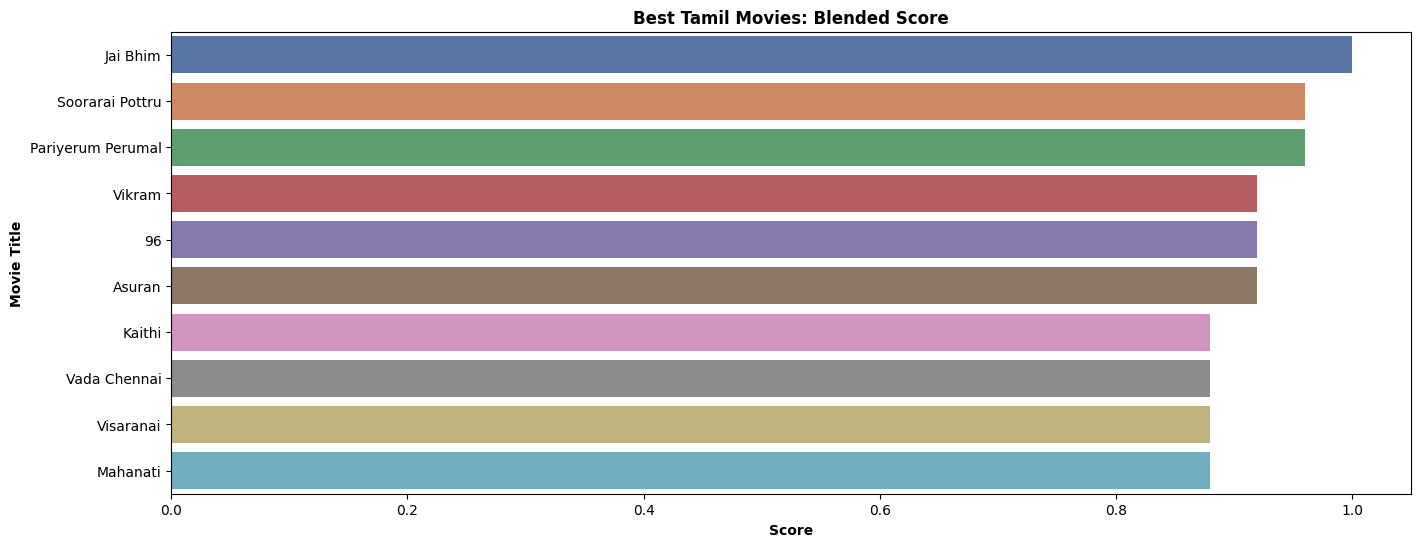

In [27]:
scored_df = df.sort_values('score', ascending=False)

plt.figure(figsize=(16, 6))

ax = sns.barplot(
    x=scored_df['score'].head(10),
    y=scored_df['Title'].head(10),
    data=scored_df,
    palette='deep'
)

plt.title('Best Tamil Movies: Blended Score', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('scored_tamil_movies.png')
plt.show()